In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy import interpolate
from sympy import Curve, sin, cos, interpolate
import scipy.interpolate as spi

In [2]:
import sympy as smp
from sympy import *
x = smp.Symbol('x')
h = smp.Function('h')(x)
h

h(x)

In [3]:
diff2_eq = Eq(h.diff(x,x),2*h)
diff2_eq

Eq(Derivative(h(x), (x, 2)), 2*h(x))

In [4]:
gen_sol = dsolve(diff2_eq,h)
gen_sol

Eq(h(x), C1*exp(-sqrt(2)*x) + C2*exp(sqrt(2)*x))

In [5]:
gen_sol.args[1]

C1*exp(-sqrt(2)*x) + C2*exp(sqrt(2)*x)

In [6]:
initial_con = [smp.Eq(gen_sol.args[1].subs(x, 0), 0), smp.Eq(gen_sol.args[1].diff(x).subs(x, 1), 1)]
initial_con

[Eq(C1 + C2, 0), Eq(-sqrt(2)*C1*exp(-sqrt(2)) + sqrt(2)*C2*exp(sqrt(2)), 1)]

In [7]:
from sympy.solvers.ode.systems import dsolve_system
initial_con_ans_1= smp.solve(initial_con)
initial_con_ans_1

{C1: -sqrt(2)*exp(sqrt(2))/(2 + 2*exp(2*sqrt(2))),
 C2: sqrt(2)*exp(sqrt(2))/(2 + 2*exp(2*sqrt(2)))}

In [8]:
initial_con_full_ans = gen_sol.subs(initial_con_ans_1)
initial_con_full_ans 

Eq(h(x), sqrt(2)*exp(sqrt(2))*exp(sqrt(2)*x)/(2 + 2*exp(2*sqrt(2))) - sqrt(2)*exp(sqrt(2))*exp(-sqrt(2)*x)/(2 + 2*exp(2*sqrt(2))))

In [9]:
given_scenario = smp.simplify(initial_con_full_ans)
given_scenario 

Eq(h(x), sqrt(2)*(exp(2*sqrt(2)*x) - 1)*exp(-sqrt(2)*(x - 1))/(2 + 2*exp(2*sqrt(2))))

# Numeric Solution.

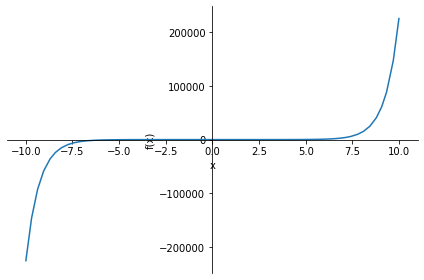

In [10]:
import matplotlib.pyplot as plt
smp.plot(given_scenario.rhs)

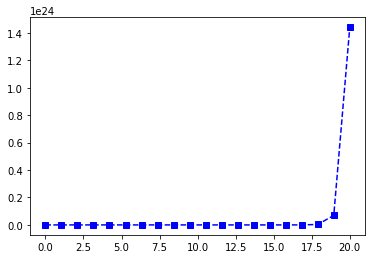

In [11]:
x = np.linspace(0,20,20)
y =  ( np.sqrt(2)*(np.exp((2*np.sqrt(2)*x)-1))*(np.sqrt(2)*(x-1)) ) / (2+2*np.exp(2*np.sqrt(2)))
plt.plot(x,y,'bs--')
plt.show()

# Let's now focus in the domain of x = [0,1]

In [12]:
n_points = [3,5,10,15,20,25]

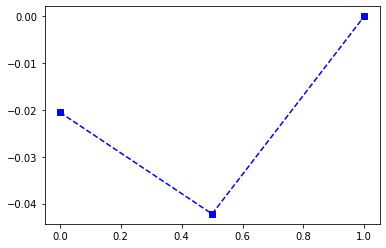

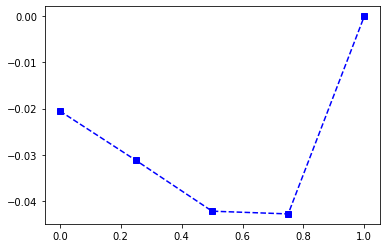

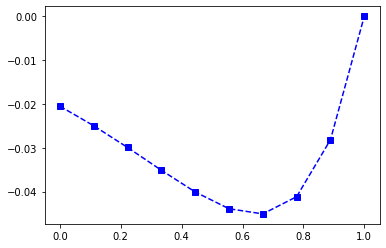

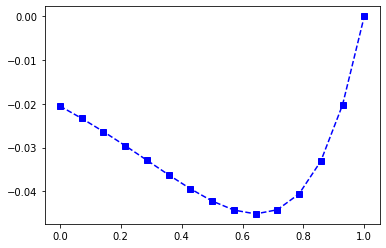

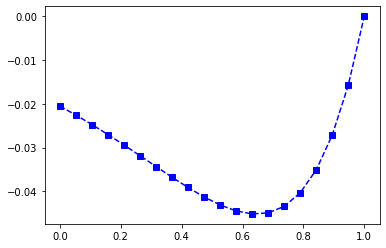

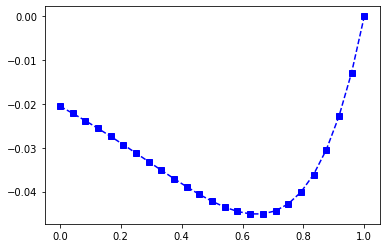

In [13]:
for n in n_points:
    x = np.linspace(0,1,n)
    y =  ( np.sqrt(2)*(np.exp((2*np.sqrt(2)*x)-1))*(np.sqrt(2)*(x-1)) ) / (2+2*np.exp(2*np.sqrt(2)))
    plt.plot(x,y,'bs--')
    plt.show()

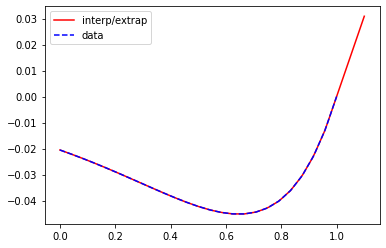

In [14]:
x_new = np.linspace(0,1.1,100)
intfunc = spi.interp1d(x,y,fill_value="extrapolate")
y_interp = intfunc(x_new)
plt.plot(x_new,y_interp,'r', label='interp/extrap')
plt.plot(x,y, 'b--', label='data')
plt.legend()
plt.show()